# **Week 7: Parameter Estimation Methods**

```
.------------------------------------.
|   __  ____  ______  _  ___ _____   |
|  |  \/  \ \/ / __ )/ |/ _ \___  |  |
|  | |\/| |\  /|  _ \| | | | | / /   |
|  | |  | |/  \| |_) | | |_| |/ /    |
|  |_|  |_/_/\_\____/|_|\___//_/     |
'------------------------------------'

```

Through various exercises, the first part of this workshop will review two common point estimation methods: the method of moments and maximum likelihood estimation. In the second part, we will focus on interval estimation using the asymptotic distribution of sample means.

## **Pre-Configurating the Notebook**

### **Switching to the R Kernel on Colab**

By default, Google Colab uses Python as its programming language. To use R instead, you’ll need to manually switch the kernel by going to **Runtime > Change runtime type**, and selecting R as the kernel. This allows you to run R code in the Colab environment.

However, our notebook is already configured to use R by default. Unless something goes wrong, you shouldn’t need to manually change runtime type.

### **Importing Required Packages**
**Run the following lines of code**:

In [ ]:
#Do not modify

setwd("/content")

# Remove `MXB107-Notebooks` if exists,
if (dir.exists("MXB107-Notebooks")) {
  system("rm -rf MXB107-Notebooks")
}

# Fork the repository
system("git clone https://github.com/edelweiss611428/MXB107-Notebooks.git")

# Change working directory to "MXB107-Notebooks"
setwd("MXB107-Notebooks")

#
invisible(source("R/preConfigurated.R"))

Loading required package: ggplot2

Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: tidyr

Loading required package: stringr

Loading required package: magrittr


Attaching package: ‘magrittr’


The following object is masked from ‘package:tidyr’:

    extract


Loading required package: IRdisplay

Loading required package: png

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘png’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: grid

Loading required package: knitr



**Do not modify the following**

In [ ]:
if (!require("testthat")) install.packages("testthat"); library("testthat")

test_that("Test if all packages have been loaded", {

  expect_true(all(c("ggplot2", "tidyr", "dplyr", "stringr", "magrittr", "knitr") %in% loadedNamespaces()))

})

Loading required package: testthat


Attaching package: ‘testthat’


The following objects are masked from ‘package:magrittr’:

    equals, is_less_than, not


The following object is masked from ‘package:tidyr’:

    matches


The following object is masked from ‘package:dplyr’:

    matches




Test passed 🌈


## **Point Estimation**

We have studied point estimation before, where our goal was to estimate population parameters such as the mean ($\mu$) and variance ($\sigma^2$). In those cases, we used the **sample mean** ($\bar{x}$)  and **sample variance** ($s^2$) as our estimators. Each of these provides a single number from the data that serves as our “best guess” for the true population parameter.

- If the population mean is $\mu$, then the sample mean $\bar{x}$ is our point estimate.
- If the population variance is $\sigma^2$, then the sample variance $s^2$ is our point estimate.

These estimators also have desirable properties: they are unbiased — ***on average***, they hit the true parameter; and they become increasingly "accurate" as the sample size grows.




More generally, we consider the situation where the sample data $\{x_1, \dots, x_n\}$ are generated according to a **statistical model** with probability distribution  

$$
f(\{x_1, \dots, x_n\} \mid \theta),
$$

where $\theta$ represents one or more unknown parameters of interest. Given the observed data, our goal is to construct an estimator $\hat{\theta}$ that provides a single “best guess” for the true value of $\theta$.  

Often, we assume that the data $\{x_1, \dots, x_n\}$ are realisations of i.i.d. random variables with probability function $p(x \mid \theta)$. In that case, the joint probability can be written as  

$$
f(\{x_1, \dots, x_n\} \mid \theta) = \prod_{i=1}^{n} p(x_i \mid \theta).
$$  

Note that, **pre-sample** (i.e. before observing any data), like sample mean and sample variance, $\hat{\theta}$ is also a random variable as it is a function of random variables (sample data). The point estimate computed after observing the sample data is a realisation of this random variable. Details about the sampling distribution of $\hat{\theta}$ are beyond the scope of this unit.

$$\hat{\theta} = T\big(\{x_1,...,x_n\}\big).$$


In this section, we will introduce two fundamental methods for constructing such estimators: the **method of moments (MoM)** and **maximum likelihood estimation (MLE)**. Both methods start from the same observed data but approach the estimation problem in different ways. While we will not study their theoretical properties (such as bias, variance, or asymptotic studies), our focus will be on understanding how these methods are are formulated and applied in practice.

### **Method of Moments**

The method of moments is a simple way to construct estimators by equating sample moments with theoretical moments. Suppose our model has an unknown parameter $\theta$, and let $m_k(\theta)$ denote the $k$-th population moment:

$$
m_k(\theta) = \mathbb{E}[X^k].
$$

From a sample $x_1, \dots, x_n$, we can compute the corresponding sample moments:

$$
\hat{m}_k = \frac{1}{n} \sum_{i=1}^{n} x_i^k.
$$

The idea of MoM is to solve the system of equations

$$
\hat{m}_k = m_k(\theta), \quad k = 1, 2, \dots
$$

for the unknown parameter(s) $\theta$. The solution gives the method of moments estimator $\hat{\theta}_{\text{MoM}}$.  In general, for a model with $k$ parameters, we need to solve $k$ equations.

MoM is intuitive and easy to compute. However, it may produce nonsensical values (e.g., negative estimates for parameters that must be positive) if the sample moments deviate strongly from theoretical constraints.


### **Maximum Likelihood Estimation**

Maximum likelihood estimation takes a different approach. Suppose the sample $x_1, \dots, x_n$ are realisations from i.i.d. random variables with probability function $p(x \mid \theta)$. The **likelihood function** is

$$
L(\theta) = \prod_{i=1}^{n} p(x_i \mid \theta),
$$

which we can also write in log form as

$$
\ell(\theta) = \log L(\theta) = \sum_{i=1}^{n} \log p(x_i \mid \theta).
$$


Note that the likelihood function is a function of the model parameter $\theta$, while the sample data $\{x_1, \dots, x_n\}$ are fixed. It represents how plausible the observed data are for each possible value of $\theta$.


The maximum likelihood estimator $\hat{\theta}_{\text{MLE}}$ is defined as the value of $\theta$ that maximises the likelihood function:

$$
\hat{\theta}_{\text{MLE}} = \arg \max_{\theta} L(\theta) = \arg \max_{\theta} \ell(\theta).
$$




In practice, we often optimise the log-likelihood function instead of the likelihood function, even though they are equivalent. This is because the log-likelihood is a sum rather than a productIn practice, we often optimise the log-likelihood function instead of the likelihood function, even though they are equivalent. This is because the log-likelihood is a sum rather than a product, making its derivatives easier to compute.

MLE has many desirable properties in large samples (beyond the scope of this unit). In many scenarios, MLE and MoM result in the same estimator. However, unlike MoM, it always respects the constraints of the parameter space as we optimises for $\theta$ over its parameter space. The main drawback is that computing $\hat{\theta}_{\text{MLE}}$ can sometimes require solving nonlinear equations or numerical optimisation. Here, however, we will primarily focus on models for which the maximum likelihood estimator, $\hat{\theta}_{\text{MLE}}$, can be derived analytically.

### **Workshop Questions**

#### **Question 1**

A factory produces light bulbs. Each bulb has a probability $p$ of being defective. A quality inspector selects 10 bulbs at random from the production line, and the number of defective bulbs in each sample is recorded as follows:

$$
\{2, 1, 0, 3, 1, 2, 1, 0, 2, 1\}
$$

Assume that the number of defective bulbs in each sample follows `Binomial(n,p)`.  

- Use the MoM and MLE to estimate the probability $p$ of a defective bulb.
- Comment on the results

In [ ]:
smpl_data = c(2,1,0,3,1,2,1,0,2,1)



<details>
<summary>▶️ Click to show the solution</summary>

Lorem ipsum dolor sit amet, consectetur adipiscing elit. Sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat.  

Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.


</details>




#### **Question 2**

The following sample data $\{3,1,2,0,6\}$ are generated from  i.i.d. `Binomial(n, p)`.  
Use the MoM to estimate the parameters $n$ and $p$, and comment on the results.

**Hint**: Use the following identity

$$\mathbb{V}[X] = \mathbb{E}[X^2] - \mathbb{E}[X]^2$$

In [ ]:
smpl_data = c(3,1,2,0,5)



<details>
<summary>▶️ Click to show the solution</summary>


For $X \sim \text{Binomial}(n, p)$, the first two theoretical moments are:

$$
\begin{align}
m_1 &= \mathbb{E}[X] = np, \\
m_2 = \mathbb{E}[X^2] &= \mathbb{V}[X] + \mathbb{E}[X]^2 = np(1-p) + (np)^2.
\end{align}
$$

From the sample $x_1, \dots, x_{5}$, we compute the corresponding sample moments:

$$
\begin{align}
\hat{m}_1 &= \frac{\sum_{i=1}^n x_i}{n},\\
\hat{m}_2 &= \frac{\sum_{i=1}^n x_i^2}{n}.
\end{align}
$$

To compute MoM estimates, we need to solve the system of equations:

$$
\begin{align}
\hat{m}_1 &= m_1, \\
\hat{m}_2 - \hat{m}_1^2 &= m_2 - m_1^2.
\end{align}
$$


Equivalently,


$$
\begin{align}
np &= \frac{\sum_{i=1}^n x_i}{n} \equiv \overline{x} = 2.2 , \\
np(1-p) + (np)^2 &= \frac{\sum_{i=1}^n x_i^2}{n} \equiv \overline{x^2} = 7.8.
\end{align}
$$

Solving for $n$ and $p$:

$$
\begin{align}
2.2(1 - \hat{p}) + (2.2)^2 &= 7.8, \\
\hat{n} &= \frac{2.2}{\hat{p}}.
\end{align}
$$

Equivalently,

$$
\begin{align}
\hat{p} &= -0.345, \\
\hat{n} &= \frac{2.2}{\hat{p}} = -6.368.
\end{align}
$$


```r

smpl_data = c(3,1,2,0,5)
x_bar = mean(smpl_data)
xsq_bar = mean(smpl_data^2)

p = 1-(xsq_bar-x_bar^2)/x_bar
n = x_bar/p

```

These are invalid because $n$ and $p$ must be positive.

</details>




#### **Question 3**
**Back to this after the second part, if there is still time.**

The following sample data are recorded as the time (in hours) until failure of 5 identical machines:

$$
\{2.3, 1.5, 0.7, 3.1, 2.0\}
$$

Assume that these data are generated from i.i.d. `Exp(lambda)`.  

**Tasks:**

- Use the MoM and MLE to estimate the parameter $\lambda$.  
- Comment on the results

In [ ]:
smpl_data = c(2.3,1.5,0.7,3.1,2.0)



<details>
<summary>▶️ Click to show the solution</summary>

Lorem ipsum dolor sit amet, consectetur adipiscing elit. Sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat.  

Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.


</details>




#### **Question 4**
**Back to this after the second part, if there is still time.**

The following sample data are the number of emails received per hour by a customer service team over 5 randomly selected hours:

$$
\{3, 2, 4, 0, 5\}
$$

Assume that these data are generated from i.i.d. `Poisson(lambda)`.  

- Use the MoM and MLE to estimate the parameter $\lambda$.  
- Comment on the results.

In [ ]:
smpl_data = c(3,2,4,0,5)



<details>
<summary>▶️ Click to show the solution</summary>

Lorem ipsum dolor sit amet, consectetur adipiscing elit. Sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat.  

Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.


</details>




## **Interval Estimation**


In many scenarios, we are interested in creating an interval that hopefully captures the parameter’s true value instead of obtaining a single point estimate:

$$\Big[T_1\big(\{x_1,...,x_n\}\big), T_2\big(\{x_1,...,x_n\}\big)\Big].$$

A common rule option $(1−\alpha)$% confidence interval, which aims to find functions $T_1$ and $T_2$ such that:

$$\Pr\Big(T_1\big(\{x_1,...,x_n\}\big) \leq \theta \leq T_2\big(\{x_1,...,x_n\}\big)\Big) = 1 - \alpha.$$

Conventionally, $\alpha = 0.05$ (95% confidence interval). Other common options include $\alpha = 0.01$ and $\alpha = 0.1$.


Note that, **pre-sample**, the upper and lower bounds of a confidence interval are random variables. This is why the previous equation is mathematically valid. The upper and lower bound estimates computed after observing the sample data are realisations of these random variables.




### **Asymptotic Confidence Interval for Population Mean**

Recall that, for i.i.d. sample of size $n$ drawn from any probability distribution with mean $\mu$ and variance $\sigma^2$, if $n$ is large enough,
$$
\begin{align}
&\quad\quad\;\,\,\displaystyle \bar{x} \approx \mathcal{N}\Big(\mu, \frac{\sigma^2}{n}\Big);\\
&\implies  \frac{\bar{x} - \mu}{\sigma/n} \approx \mathcal{N}(0,1); \\
&\implies \Pr\Big(z_{\alpha/2} \leq \frac{\bar{x} - \mu}{\sigma/n} \leq z_{1-\alpha/2}\Big) \approx 1 - \alpha;\\
&\implies \Pr\Big(\bar{x} + z_{\alpha/2}\frac{\sigma}{n} \leq \mu \leq \bar{x} + z_{1-\alpha/2}\frac{\sigma}{n}\Big) \approx 1 - \alpha\\
&\implies \Pr\Big(\bar{x} - z_{1-\alpha/2}\frac{\sigma}{n} \leq \mu \leq \bar{x} + z_{1-\alpha/2}\frac{\sigma}{n}\Big) \approx 1 - \alpha.
\end{align}
$$  

Here, $z_{\alpha/2}$ and $z_{1-\alpha/2}$ are $\alpha/2$ and $1-\alpha/2$ quantiles of the standard Gaussian distribution $\mathcal{N}(0,1)$. As the standard Gaussian PDF is symmetric around 0, $z_{\alpha/2} = -z_{1-\alpha/2}$.





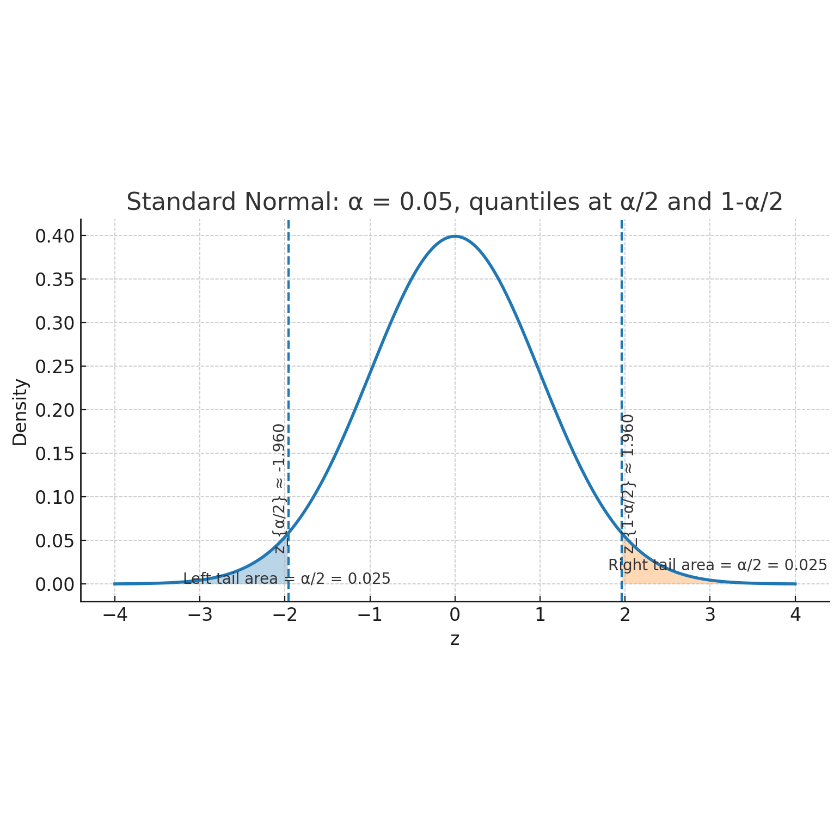

In [ ]:
img = readPNG("figures/z_95int.png")
grid.newpage()
vp = viewport()
pushViewport(vp)
grid.raster(img)
popViewport()

An asymptotically valid confidence interval for population mean can be obtained by choosing:

$$
\begin{align}
T_1\big(\{x_1,...,x_n\}\big) &= \bar{x} - z_{1-\alpha/2}\frac{\sigma}{n};\\
T_2\big(\{x_1,...,x_n\}\big) &= \bar{x} + z_{1-\alpha/2}\frac{\sigma}{n}.
\end{align}
$$

Confidence intervals constructed following this rule are symmetric around sample means.

A $95\%$ symmetric confidence interval can be constructed by choosing:

$$
\begin{align}
T_1\big(\{x_1,...,x_n\}\big) &= \bar{x} - z_{0.975}\frac{\sigma}{n};\\
T_2\big(\{x_1,...,x_n\}\big) &= \bar{x} + z_{0.975}\frac{\sigma}{n}.
\end{align}
$$

Of course, one can construct an annoying asymmetrical confidence interval like this:

$$
\begin{align}
T_1\big(\{x_1,...,x_n\}\big) &= \bar{x} + z_{0.01}\frac{\sigma}{n};\\
T_2\big(\{x_1,...,x_n\}\big) &= \bar{x} + z_{0.96}\frac{\sigma}{n};
\end{align}
$$

Or an annoying $61\%$ symmetric confidence interval (we might be the first ones to use a $61\%$ confidence interval):

$$
\begin{align}
T_1\big(\{x_1,...,x_n\}\big) &= \bar{x} + z_{0.195}\frac{\sigma}{n};\\
T_2\big(\{x_1,...,x_n\}\big) &= \bar{x} + z_{0.805}\frac{\sigma}{n}
\end{align}
$$

If data are generated from i.i.d. Gaussians, these $1-\alpha$ confidence intervals are **ALWAYS** valid regardless of the sample size.



In practice, the variance $\sigma^2$ (or equivalently, the standard deviation $\sigma$) is usually unknown. However, we can replace $\sigma^2$ by the sample variance estimate. This is a plug-in estimator.

> A plug-in estimator is obtained by taking a formula that involves an unknown parameter and plugging in an estimate of that parameter (usually computed from data).

### **Finding Quantiles**

You can find quantiles of the standard Gaussian distribution in a $Z$ statistical table.

*Tutors are expected to show students how to find these values, especially common ones such as 0.95, 0.975, and 0.995*

In [43]:
generateZTable()



|     |   0.00|   0.01|   0.02|   0.03|   0.04|   0.05|   0.06|   0.07|   0.08|   0.09|
|:----|------:|------:|------:|------:|------:|------:|------:|------:|------:|------:|
|-3.4 | 0.0003| 0.0003| 0.0004| 0.0004| 0.0004| 0.0004| 0.0004| 0.0004| 0.0005| 0.0005|
|-3.3 | 0.0005| 0.0005| 0.0005| 0.0005| 0.0006| 0.0006| 0.0006| 0.0006| 0.0006| 0.0007|
|-3.2 | 0.0007| 0.0007| 0.0007| 0.0008| 0.0008| 0.0008| 0.0008| 0.0009| 0.0009| 0.0009|
|-3.1 | 0.0010| 0.0010| 0.0010| 0.0011| 0.0011| 0.0011| 0.0012| 0.0012| 0.0013| 0.0013|
|-3.0 | 0.0013| 0.0014| 0.0014| 0.0015| 0.0015| 0.0016| 0.0016| 0.0017| 0.0018| 0.0018|
|-2.9 | 0.0019| 0.0019| 0.0020| 0.0021| 0.0021| 0.0022| 0.0023| 0.0023| 0.0024| 0.0025|
|-2.8 | 0.0026| 0.0026| 0.0027| 0.0028| 0.0029| 0.0030| 0.0031| 0.0032| 0.0033| 0.0034|
|-2.7 | 0.0035| 0.0036| 0.0037| 0.0038| 0.0039| 0.0040| 0.0041| 0.0043| 0.0044| 0.0045|
|-2.6 | 0.0047| 0.0048| 0.0049| 0.0051| 0.0052| 0.0054| 0.0055| 0.0057| 0.0059| 0.0060|
|-2.5 | 0.0062| 0.0064| 0.0066

### **Example**



The following sample are generated from i.i.d. random variables with unknown mean $\mu$ and variance $\sigma^2 = 1$.

$$\{0.13, 0.68, 0.26, 0.97, 1.2, 0.74, 0.42, 0.2, 2.13, 0.06, 1.18, 0.25, 3.12, 4.16, 2.05, 0.21, 2.14,2,0.85,0.07,0.04,0.77,0.3,0.53,0.3,0.82,0.53,0.08,0.22,0.14,0.17,0.81,0.29,0.57,0.08,0.2,1.94,3.34,2.09,0.95,0.44\}$$

Compute a $90\%$ symmetric confidence interval estimate for $\mu$ using the asymptotic distribution of $\bar{x}$ using
- The true variance
- The estimated variance

Comment on the results.

In [44]:
smpl_data = c(0.13, 0.68, 0.26, 0.97, 1.2, 0.74, 0.42, 0.2, 2.13, 0.06, 1.18, 0.25, 3.12, 4.16, 2.05, 0.21, 2.14,2,0.85,0.07,0.04,0.77,0.3,0.53,0.3,0.82,0.53,0.08,0.22,0.14,0.17,0.81,0.29,0.57,0.08,0.2,1.94,3.34,2.09,0.95,0.44)




<details>
<summary>▶️ Click to show the solution</summary>

Lorem ipsum dolor sit amet, consectetur adipiscing elit. Sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat.  

Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.


</details>




### **Making Sense of Confidence Intervals**